Contents Introduction Microelectrode Basics ME Theory ME Geometries Disk-shaped specific ME theory Experimental Design MEs Materials Noble Metals Carbon materials ME Surface Modifications Electron Transfer Nature to the ME surface Microelectrode arrays MEAs Electrochemical Methods Voltammetry Amperometry Electrochemical Impedance Spectroscopy EIS Stochastic Collision Nanoelectrochemistry SCNEC Scanning Electrochemical Microscopy SECM Bioanalytical Applications Detection of Dissolved Bioanalytes In Vivo Neurochemicals Cells and their dissolved molecules Nucleic Acid Biosensors Detection of Adhered Bioanalytes Cells Bacteria Collision-based Detection of Bioanalyte Viruses ii Bacteria Nucleic Acids Cells and Enzymes Conclusions and Future Prospects References Microelectrodes An Overview of Probe Development and Bio-electrochemistry Applications from to Siba Moussa Janine Mauzeroll Department of Chemistry McGill University Montreal Quebec Canada HA B Microelectrodes are small scale electro

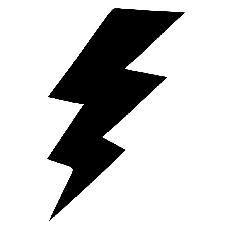

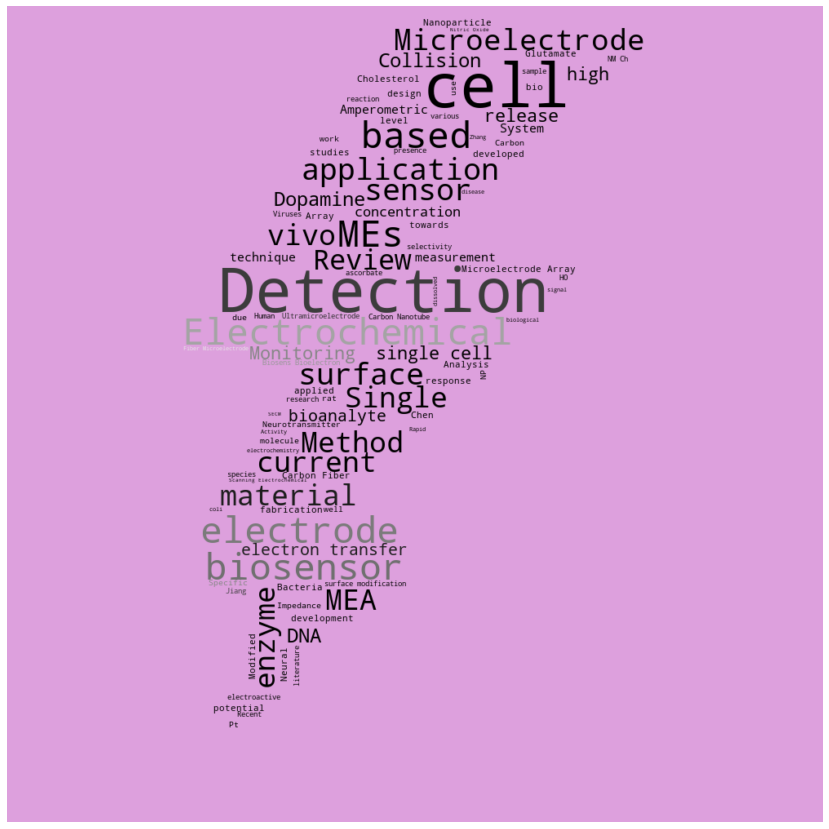

In [74]:
# Import Packages

# File Handling
import sys
import io
from io import StringIO
from os import path

# PDF Processing
from pdfminer.pdfparser import PDFParser
from pdfminer.pdfdocument import PDFDocument
from pdfminer.pdfpage import PDFPage
from pdfminer.pdfpage import PDFTextExtractionNotAllowed
from pdfminer.pdfinterp import PDFResourceManager
from pdfminer.pdfinterp import PDFPageInterpreter
from pdfminer.layout import LAParams
from pdfminer.converter import TextConverter
import re

# Text Handling and Figure Generation
import numpy as np
import pandas as pd
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import textblob
from textblob import TextBlob
from string import punctuation
import matplotlib.pyplot as plt
import seaborn as sns


###############################

## Extract Text from PDF
def extract_text_from_pdf(pdf_path):
    resource_manager = PDFResourceManager()
    fake_file_handle = io.StringIO()
    converter = TextConverter(resource_manager, fake_file_handle)
    page_interpreter = PDFPageInterpreter(resource_manager, converter)
    with open(pdf_path, 'rb') as fh:
        for page in PDFPage.get_pages(fh,
                                      caching=True,
                                      check_extractable=True):
            page_interpreter.process_page(page)
        text = fake_file_handle.getvalue()
    # close open handles
    converter.close()
    fake_file_handle.close()
    if text:
        return text


text = extract_text_from_pdf(r'\Users\admin\Desktop\Website\Word cloud\JES.pdf')

###### Text Cleaning ######

## Remove numerical text
def remove_num(text):
    text = ''.join([i for i in text if not i.isdigit()])
    return text
text = np.vectorize(remove_num)(text)


## Remove punctuation:
def remove_punct(text):
    text = ' '.join(word.strip(punctuation) for word in text.split() if word.strip(punctuation))
    return text
text = np.vectorize(remove_punct)(text)


## Remove stopwords of your liking + python defined stop words
stop_words=list(STOPWORDS)
additional_stop_words=["McGill" "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours",
                         "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it",
                         "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who",
                         "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been",
                         "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "Mr",
                         "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with",
                         "about", "against", "between", "into", "through", "during", "before", "after", "above",
                         "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again",
                         "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any",
                         "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only",
                         "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should",
                         "now", "Wang", "Li", "group", "may","Figure","Anal","Chem","Using","using","figure","wang","used"]


stop_words.extend(additional_stop_words)
text=text.tolist()


## Prepare Mask Image
mask = np.array(Image.open(r'\Users\admin\Desktop\Website\Word cloud\Mask.jpg'))
plt.imshow(mask)
plt.axis("off")

## Create and format Wordcloud and set maxmium number of words 
wordcloud = WordCloud(mask=mask, width=2000, height=1000, contour_color="black", max_words=100, relative_scaling=0,background_color="plum",stopwords=stop_words).generate(text)
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[20, 15])
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
_ = plt.show()

